# Project: Analysis of medical appointments(in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**No-Show appointments**
> Data set consists of data of medical appointments in Brazil, is focused on the question whether people turn up for appointment or not.
>Characteristics of the data set
<ol>
    <li>Neighbourhood-gives location</li>
    <li>Gender</li>
    <li>Age</li>
    <li>Scholarship</li>
    <li>Hipertension</li>
    <li>No-show-This shows whether appointment taken or not if value is No, then appointment taken and vice-versa</li>
    </ol>

### Posing Questions
<ol>
    <li>Observing people appointments with respect to scholarship?</li>
    <li>Based on location and hipertension how people appointments affected?</li>
    <li>Male vs Female scholarship and its effect on appointment</li>
    <li>Which age people are not taking appointments mostly with respect to Neighbourhood?</li>
    <li>People with hipertension,diabetes appointment vs Ppl without hipertension,diabetes appointment</li>
    </ol>
    

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib notebook

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#reading the data into a dataframe using pd.read_csv('filepath/name')
data=pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 
#checking whether data read correctly or not and data.head() as it returns first five rows here we used it since dataset is big 
print(data.head())                                          


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [3]:
#convert the dataframe data into a data frame that allows access using a unique value
#this allows to remove duplicates in the data frame
df=data.set_index('PatientId')
print(df.head())

              AppointmentID Gender          ScheduledDay  \
PatientId                                                  
2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

                    AppointmentDay  Age      Neighbourhood  Scholarship  \
PatientId                                                                 
2.987250e+13  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
5.589978e+14  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
4.262962e+12  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0   
8.679512e+11  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0   
8.841186e+12  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   

              Hipertension  Diabetes  Alcoholism  Han

In [4]:
df.columns = df.columns.str.replace('No-show','NoShow')
df.columns

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'NoShow'],
      dtype='object')

### Data Cleaning


In [5]:
#getting dataframe with required col's 
#refering to the questions posed above the col's are selected 
df_investigate=df[['Gender','ScheduledDay','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','NoShow']]
print(df_investigate.head())

             Gender          ScheduledDay  Age      Neighbourhood  \
PatientId                                                           
2.987250e+13      F  2016-04-29T18:38:08Z   62    JARDIM DA PENHA   
5.589978e+14      M  2016-04-29T16:08:27Z   56    JARDIM DA PENHA   
4.262962e+12      F  2016-04-29T16:19:04Z   62      MATA DA PRAIA   
8.679512e+11      F  2016-04-29T17:29:31Z    8  PONTAL DE CAMBURI   
8.841186e+12      F  2016-04-29T16:07:23Z   56    JARDIM DA PENHA   

              Scholarship  Hipertension  Diabetes NoShow  
PatientId                                                 
2.987250e+13            0             1         0     No  
5.589978e+14            0             0         0     No  
4.262962e+12            0             0         0     No  
8.679512e+11            0             0         0     No  
8.841186e+12            0             1         1     No  


In [6]:
df_investigate.dtypes #checking whether all col's are with proper data types(example : age can't be string but must be int)

Gender           object
ScheduledDay     object
Age               int64
Neighbourhood    object
Scholarship       int64
Hipertension      int64
Diabetes          int64
NoShow           object
dtype: object

In [7]:
#after checking the data types of the col's in the data frame to investigate converting them to appropriate data type
#converting data in the ScheduledDay from dtype object to dtype datatime
df_investigate1=df_investigate[df_investigate['ScheduledDay']==pd.to_datetime(df['ScheduledDay'])].copy()
df_investigate.head()

,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,NoShow
PatientId,,,,,,,,
2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,No
5.589978e+14,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,No
4.262962e+12,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,No
8.679512e+11,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,No
8.841186e+12,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,No


In [8]:
#knowing the data types of the data in the col's after conversion into proper dtypes
df_investigate.dtypes


Gender           object
ScheduledDay     object
Age               int64
Neighbourhood    object
Scholarship       int64
Hipertension      int64
Diabetes          int64
NoShow           object
dtype: object

In [9]:
#removing noisy data ,here as of interest we got data Frame with required col's 
#age can't be negative so removing such noisy data if any this is achieved as follows
df_investigate=df_investigate[df_investigate['Age']>=0]
#performing a comparision on  a col and obtaining the filtered data

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df_investigate.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
#print ("\nMissing values per row:")
#print (df_investigate.apply(num_missing, axis=1).head())
df_investigate.head()

Missing values per column:
Gender           0
ScheduledDay     0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
NoShow           0
dtype: int64


,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,NoShow
PatientId,,,,,,,,
2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,No
5.589978e+14,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,No
4.262962e+12,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,No
8.679512e+11,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,No
8.841186e+12,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,No


>from the above finding no missing values hence imputing missing values is not necessary

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
# Markdown cells to document your observations and findings.
df_show=df_investigate[['Gender','Neighbourhood','Scholarship','NoShow','Hipertension']] #getting dataframe with required features
print(df_show.head()) 

             Gender      Neighbourhood  Scholarship NoShow  Hipertension
PatientId                                                               
2.987250e+13      F    JARDIM DA PENHA            0     No             1
5.589978e+14      M    JARDIM DA PENHA            0     No             0
4.262962e+12      F      MATA DA PRAIA            0     No             0
8.679512e+11      F  PONTAL DE CAMBURI            0     No             0
8.841186e+12      F    JARDIM DA PENHA            0     No             1


### Based on Scholarship ,how appointment is affected ? 
>**Parameters** 
<ol>
    <li>Scholarship - Independent variable</li>
    <li>Appointment(NoShow)-dependent variable on above variable</li>

<IPython.core.display.Javascript object>


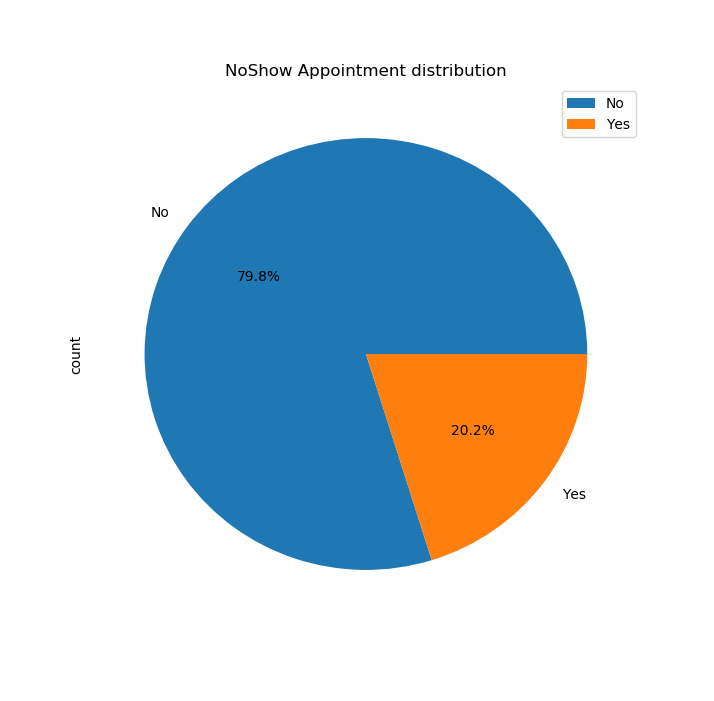

,NoShow,count
0,No,88207
1,Yes,22319


In [12]:
#data frame of interested investigation 
df_Scholarship=df_show[['Scholarship','NoShow']]
view_NoShow=df_Scholarship.groupby(['NoShow'],as_index=False)
view_NoShow_df=pd.DataFrame(view_NoShow.size().reset_index(name = "count"))
view_NoShow_df.plot(kind='pie',y='count',autopct='%1.1f%%',labels=view_NoShow_df['NoShow'])
#sns.kdeplot(view_NoShow_df['NoShow'],shade=True)
plt.title('NoShow Appointment distribution')
view_NoShow_df.head()

**from the above visualization following observations can be made :**
<ul><li>People with NoShow value 'No' that is who turnup is 79.8 % of total </li>
    <li>People with NoShow value 'Yes' that is who don't turnup is 20.2 % of total </li>
    </ul>

<IPython.core.display.Javascript object>


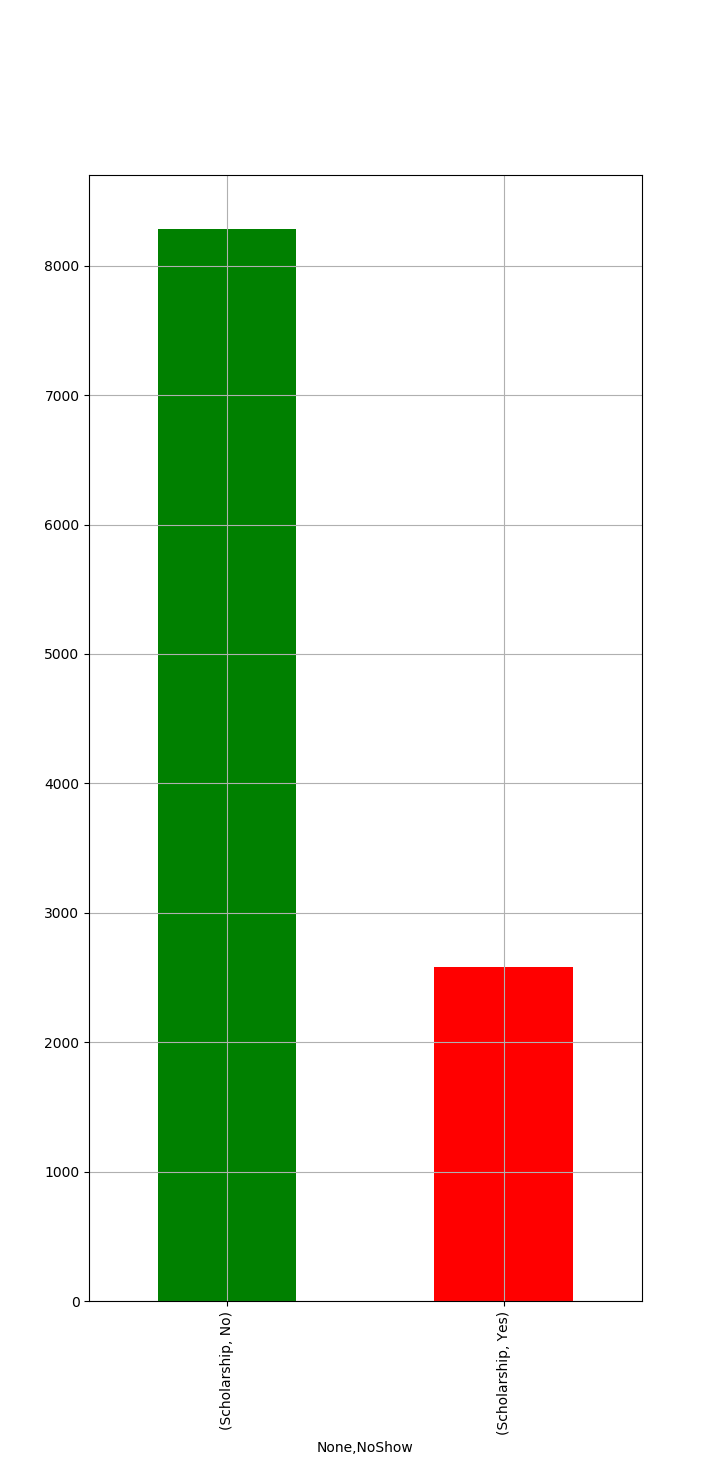

In [13]:
#to visualize the scholarship with No-->NoShow and yes-->NoShow 
view_Scholarship_NoShow=df_Scholarship.groupby(['NoShow']).sum()
view_Scholarship_NoShow.unstack().plot(kind='bar',stacked=True,  color=['green','red'], grid=True)

In [14]:
#data Frame with group by NoShow 
var_df_Scholarship1=df_Scholarship.groupby(['NoShow'],as_index=False).sum()
#getting the probability of scholarship making to turn up for appointment
print('probability of a person to turnup for appointment on getting Scholarship : ',(var_df_Scholarship1[var_df_Scholarship1['NoShow']=='No']['Scholarship'].sum())/var_df_Scholarship1['Scholarship'].sum())

probability of a person to turnup for appointment on getting Scholarship :  0.762636957923


### Based on Neighbourhood and Scholarship ,how appointment is affected ? 
>**Parameters** 
<ol>
    <li>Neighbourhood - Independent variable</li>
    <li>Scholarship - Independent variable</li>
    <li>Appointment(NoShow)-dependent variable on above variables</li>

In [15]:
df_location_Scholarship=df_show[['Neighbourhood','Scholarship','NoShow']]
print(len(df_location_Scholarship))
#view_loc_Scholar=df_location_Scholarship.groupby(['Neighbourhood','NoShow'],as_index=False).sum()
view_loc_Scholar = df_location_Scholarship.groupby( [ "Neighbourhood", "NoShow",'Scholarship'],as_index=False )
#adding a new column count as NoShow is categorical and here we take count of similar values
g=pd.DataFrame(view_loc_Scholar.size().reset_index(name = "Count"))
g

110526


,Neighbourhood,NoShow,Scholarship,Count
0,AEROPORTO,No,0,7
1,AEROPORTO,Yes,0,1
2,ANDORINHAS,No,0,1510
3,ANDORINHAS,No,1,231
4,ANDORINHAS,Yes,0,429
5,ANDORINHAS,Yes,1,92
6,ANTÔNIO HONÓRIO,No,0,212
7,ANTÔNIO HONÓRIO,No,1,9
8,ANTÔNIO HONÓRIO,Yes,0,45
9,ANTÔNIO HONÓRIO,Yes,1,5


<IPython.core.display.Javascript object>


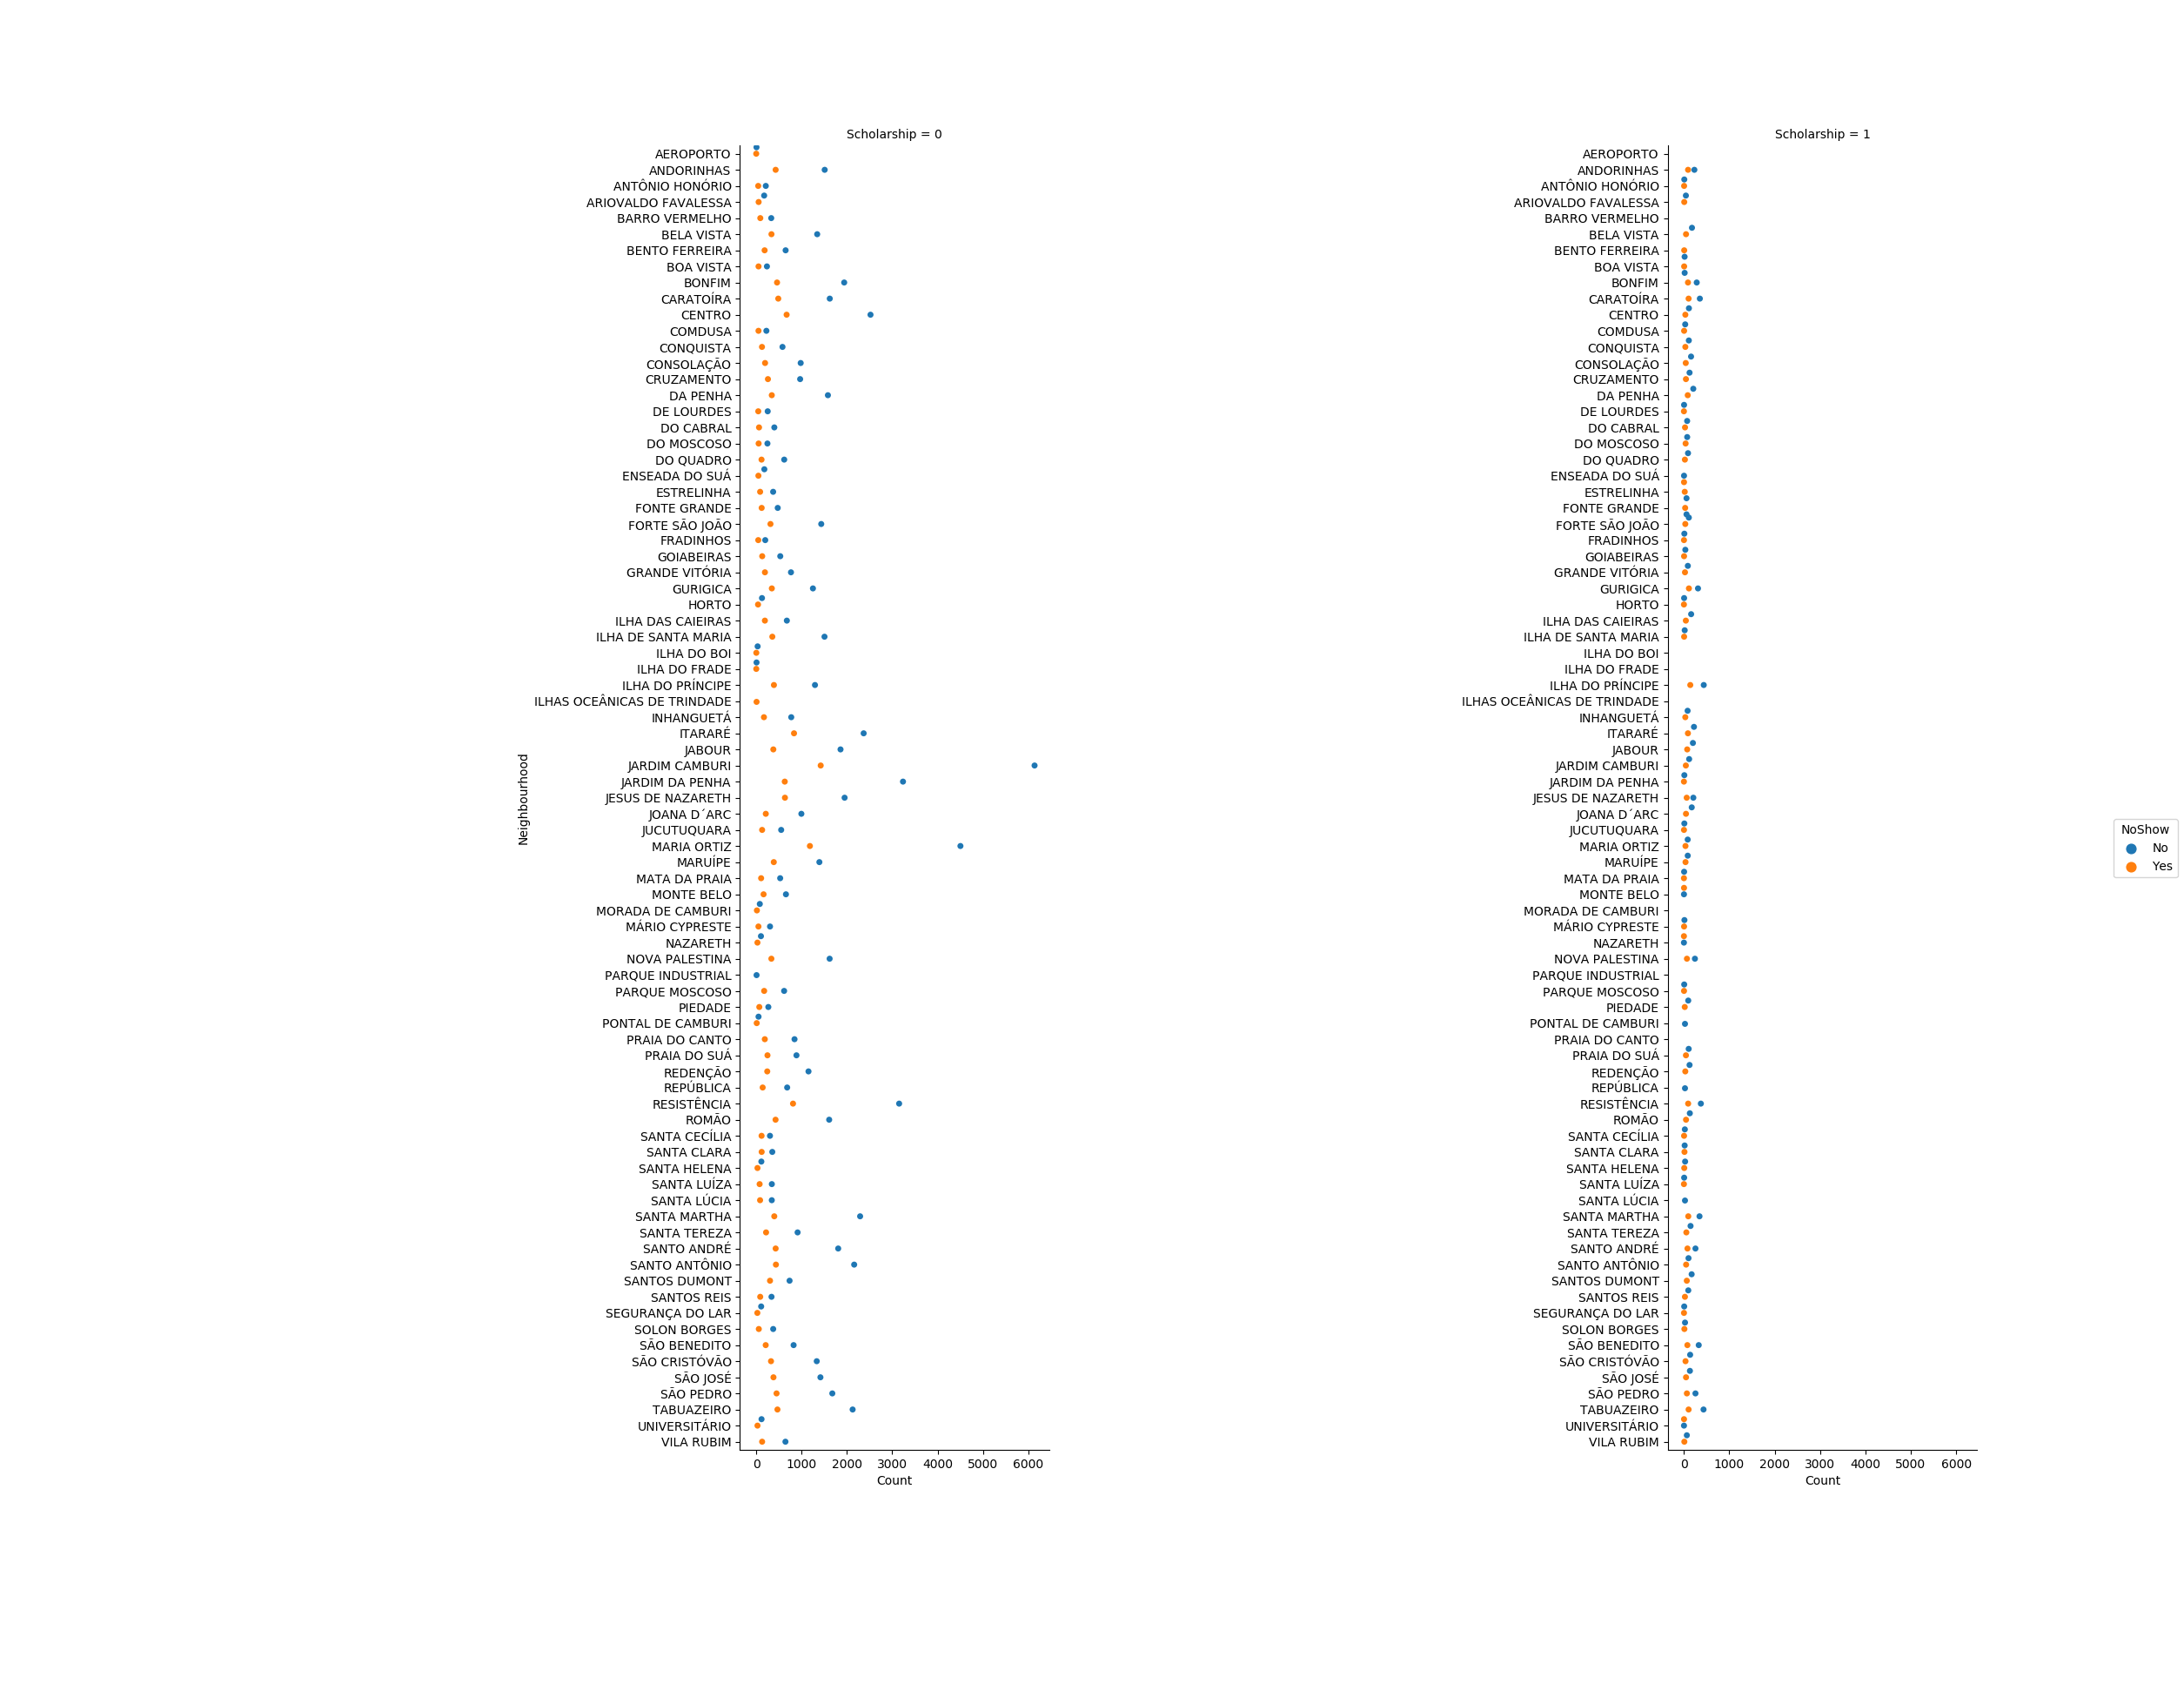

In [16]:
sns.factorplot(x="Count", y="Neighbourhood", hue="NoShow", data=g, col ="Scholarship", kind="swarm")
#requesting to view the image --> in new tab for proper view (open in .ipynb )

In [17]:
g.describe()

,Scholarship,Count
count,303.000000,303.000000
mean,0.471947,364.772277
std,0.500038,672.222097
min,0.000000,1.000000
25%,0.000000,32.000000
50%,0.000000,114.000000
75%,1.000000,365.000000
max,1.000000,6136.000000


**OBSERVATIONS**
<ul>
    plot among the variables Neighbourhood,Scholarship,NoShow 
      <li>Very less people got scholarships from each city </li>
    <li>On an average for each city ,364 people turnup for appointment </li>
    <li>People from most of the cities have dont turnup for appointment are less than 1000(for each city)</li>
    <li>Max number of people turnup for appointment (each city considered) is 6136</li>


### MALE Vs FEMALE, Scholarship  and its effect on NoShow Appointment
>**Parameters** 
<ol>
    <li>Scholarship - Independent variable</li>
    <li>Gender -Independent Variable</li>
    <li>Appointment(NoShow)-dependent variable on above variables</li>

<IPython.core.display.Javascript object>


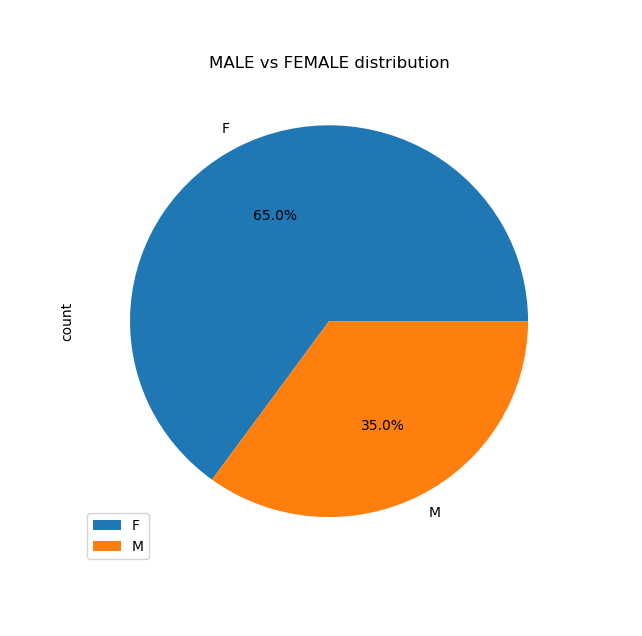

,Gender,count
0,F,71839
1,M,38687


In [20]:
#data frame of interested investigation 
df_gender=df_show[['Gender','NoShow']]
view_gender=df_gender.groupby(['Gender'],as_index=False)
view_gender_df=pd.DataFrame(view_gender.size().reset_index(name = "count"))
view_gender_df.plot(kind='pie',y='count',autopct='%1.1f%%',labels=view_gender_df['Gender'])
plt.title('MALE vs FEMALE distribution')
view_gender_df.head()

**OBSERVATIONS**
<ul>
    <li>Male population observed : 35%</li>
    <li>Female population observed : 65%</li>
    </ul>
    <ul>**Female population is more than male population</ul>

<IPython.core.display.Javascript object>


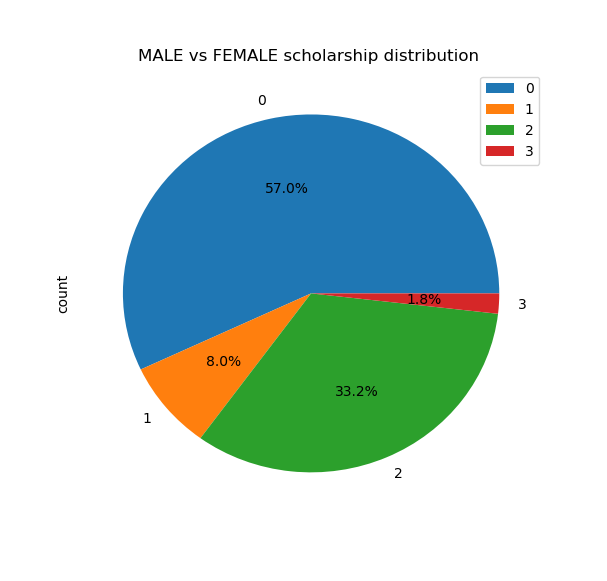

,Gender,Scholarship,count
0,F,0,62986
1,F,1,8853
2,M,0,36679
3,M,1,2008


In [34]:
#getting data frame to investigate
df_gender_noshow=df_show[['Gender','Scholarship']]
view_gender_noShow=df_gender_noshow.groupby(['Gender','Scholarship'],as_index=False)
view_gender_noShow_df=pd.DataFrame(view_gender_noShow.size().reset_index(name = "count"))
view_gender_noShow_df.plot(kind='pie',y='count',autopct='%1.1f%%')
plt.title('MALE vs FEMALE scholarship distribution ')
view_gender_noShow_df.head()

In [35]:
view_gender_noShow_df.describe()

,Scholarship,count
count,4.00000,4.000000
mean,0.50000,27631.500000
std,0.57735,27934.409731
min,0.00000,2008.000000
25%,0.00000,7141.750000
50%,0.50000,22766.000000
75%,1.00000,43255.750000
max,1.00000,62986.000000


**Observations**
    <ul><li>Female population getting more number of scholarships than male population </li>
</ul>
    

<IPython.core.display.Javascript object>


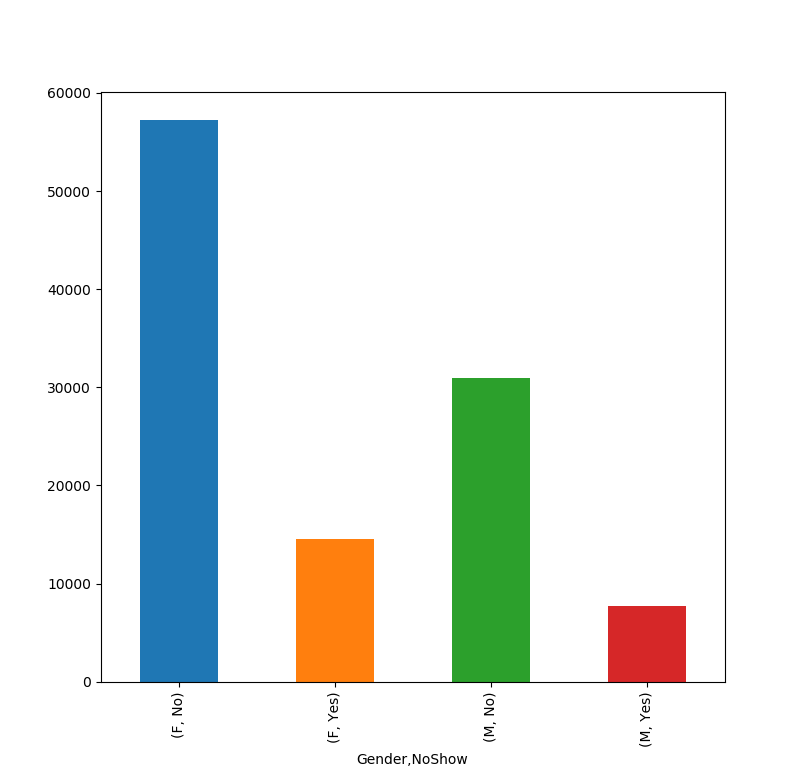

In [33]:
df_gender_Scholarship=df_show[['Gender','Scholarship','NoShow']]
#grouping data frame based on gender,NoShow and ploting a histogram
df_gender_Scholarship.groupby(['Gender','NoShow']).size().plot(kind='bar')

In [38]:
var_df_gender=df_gender_Scholarship.groupby(['Gender','NoShow'],as_index=False).size()
#getting the probability of scholarship making to turn up for appointment
var_df_gender

Gender  NoShow
F       No        57245
        Yes       14594
M       No        30962
        Yes        7725
dtype: int64

In [39]:
#female patients probability of taking appointment
p=57245+14594
p=57245/p
print('Female patients probability of taking appointment : ',p)
q=30962+7725
q=30962/q
print('Male patients probability of taking appointment : ',q)

Female patients probability of taking appointment :  0.7968512924734475
Male patients probability of taking appointment :  0.8003205211052808


In [40]:
view_Gen_Scholar = df_gender_Scholarship.groupby( [ "Gender", "NoShow",'Scholarship'],as_index=False )
g_df=pd.DataFrame(view_Gen_Scholar.size().reset_index(name = "Count"))
g_df

,Gender,NoShow,Scholarship,Count
0,F,No,0,50498
1,F,No,1,6747
2,F,Yes,0,12488
3,F,Yes,1,2106
4,M,No,0,29426
5,M,No,1,1536
6,M,Yes,0,7253
7,M,Yes,1,472


<IPython.core.display.Javascript object>


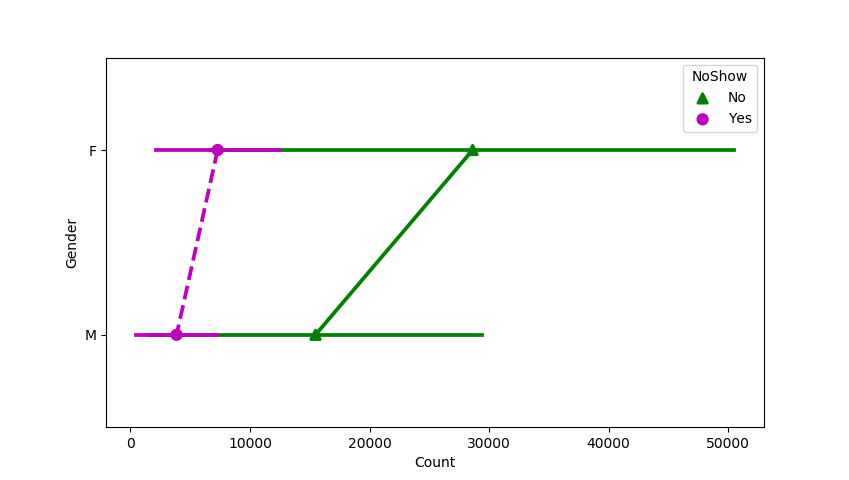

In [41]:
sns.pointplot(x="Count", y="Gender", hue="NoShow", data=g_df,palette={"No": "g", "Yes": "m"},markers=["^", "o"], linestyles=["-", "--"])

**OBSERVATIONS**
<ul>
    <li>Female population is slightly greater than male population in not turnup to appointment</li>
    

<IPython.core.display.Javascript object>


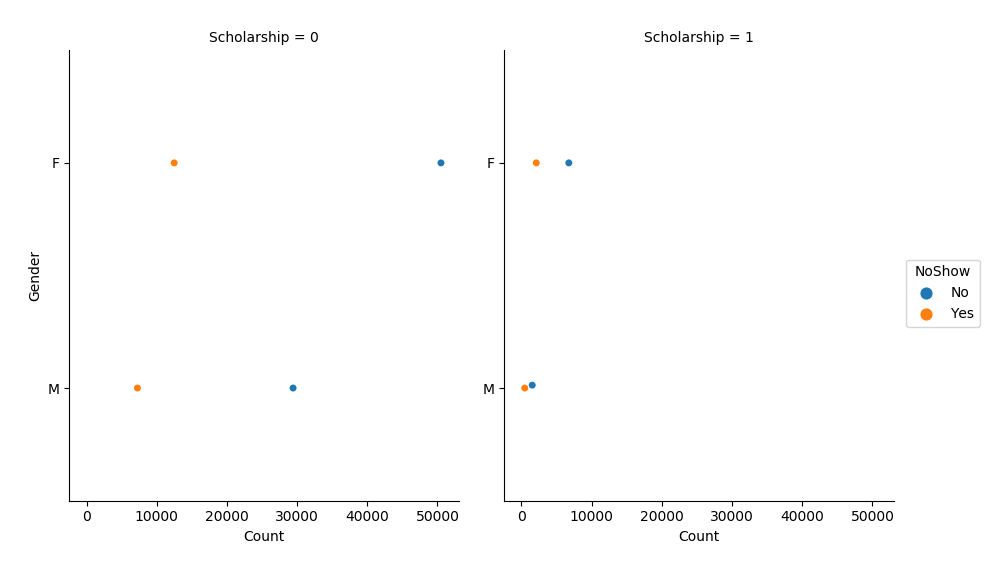

In [42]:
#to know how scholarship effects appointment based on gender
#plot a swarmplot using seaborn 
sns.factorplot(x="Count", y="Gender", hue="NoShow", data=g_df, col ="Scholarship", kind="swarm")

**OBSERVATIONS**
<ul><li>Female population who got scholarship dont turnup for appointment are greater in number than male population who got scholarship</li>
    

<a id='conclusions'></a>
## Conclusions

**LIMITATIONS**
>On Data :
<li>To make dataset having all objects as unique to eachother without duplicates ,patientId used as primary key and duplicates are avoided</li>
<li>Data Column 'age' is negative for some rows ,so modification is required as age can't be negative</li>
<li>Data Columns like NoShow are categorical so to plot, a new column added to the investigating dataFrame count based on values of that column</li>
>On Analysis :
<li>To analyze the dataset, based on few attributes overall dataset is analysed ,selecting investigation dataFrame with required attributes</li>
<li>To analyze the people who received scholarship turnup for appointment ,number of data objects has been reduced as all the data objects didnt received scholarship</li>

### Findings
>#### Based on Neighbourhood and Scholarship ,how appointment is affected ? 
**findings Based on Scholarship as independent variable and NoShow as dependent**
<ul>following observation has been made :
    <li>Individual who is getting Scholarship there is a probabiity of 0.76 that he/she takes appointment</li>
    </ul>
**findings based on Neighbourhood , Scholarship and NoShow**
<ul>from the visuvalization,
    <li>No Location is getting scholarship for more than 1000 persons</li>
    <li>Many Locations are having almost less than 1000 persons that dont turnup for appointment who are not getting any Scholarship</li>
    <li>Highest no.of persons turnup for appointment even though no Scholarship (considering single location) is around 6000</li>
    </ul>

>**MALE Vs FEMALE Scholarship based on Neighbourhood and its effect on NoShow Appointment**
><ul>From the Visualizations,
    <li>No.of Female patients are greater than no.of male patients </li>
    <li>Female patients  dont turn up for appointment comparitively to male patients</li>
    <li>Patients who are getting scholarship that dont turnup for appointment are more females than males</li>
  </ul>
  

**REFERENCES**
> <li>https://www.analyticsvidhya.com/blog/2015/05/data-visualization-python/</li>
> <li>https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger</li>
> <li>https://seaborn.pydata.org/tutorial/categorical.html</li>
